In [1]:
# Dataframe
import pandas as pd

#nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#Regular Expressions
import re

# Maptplolib
import matplotlib.pyplot as plt 

#Numpy
import numpy as np 

# Seaborn
import seaborn as sns 

# Scikit-learn
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Read Dataset

# Dataset Details
# messages : the text of news
# labels   : type of news(neutral,positive,negative)
# target   : the polarity of the news (0 = negative, 2 = neutral, 4 = positive)

In [3]:
news_df = pd.read_csv('all-data.csv',names = ['lables','messages'])
news_df.head()

,lables,messages
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [4]:
# Check for nulll values
news_df.isnull().sum()

lables      0
messages    0
dtype: int64

In [5]:
# Shape of our dataset
news_df.shape

(4846, 2)

In [6]:
df_copy = news_df.copy()
df_copy.head()

,lables,messages
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [7]:
# Map target label to String
# 0 -> NEGATIVE
# 2 -> NEUTRAL
# 4 -> POSITIVE

def func(df):
    if df == 'neutral':
        return 0
    elif df == 'negative':
        return 1
    else:
        return 2
df_copy['target'] = df_copy.lables.apply(func)
df_copy.head()

,lables,messages,target
0,neutral,"According to Gran , the company has no plans t...",0
1,neutral,Technopolis plans to develop in stages an area...,0
2,negative,The international electronic industry company ...,1
3,positive,With the new production plant the company woul...,2
4,positive,According to the company 's updated strategy f...,2


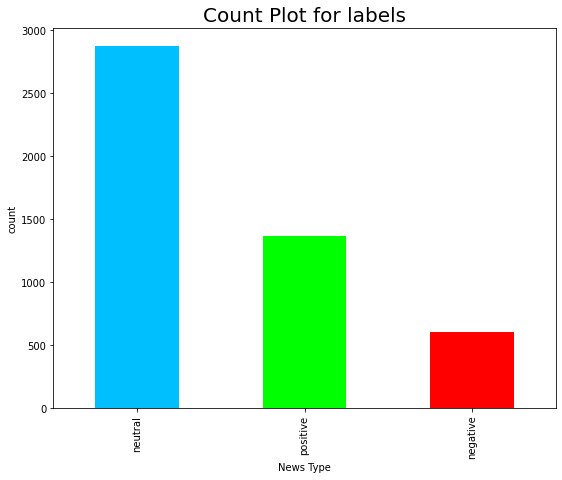

In [8]:
# Count plot for labels feature
plt.figure(figsize=(9,7))
df_copy.lables.value_counts().plot(kind='bar',color=['deepskyblue','lime','red'])
plt.xlabel("News Type")
plt.ylabel("count")
plt.title("Count Plot for labels",{'fontsize':20});

In [9]:
# Text preprocessing
corpous = list()

#Object for porterstem
ps = PorterStemmer()

for i in range(len(df_copy)):
    text = re.sub(r'[^a-zA-Z]',' ',df_copy.messages[i])
    text = text.lower()
    text = text.split()
    text = [ps.stem(word) for word in text if word not in set(stopwords.words('english'))]
    text = ' '.join(text)
    corpous.append(text)


In [10]:
# We used CountVectorizer to transform a given text into a vector on the basis of the frequency of each word that occurs in the entire text.

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpous).toarray()

In [12]:
# Dependent Feature
y = df_copy.target

In [13]:
# This is one of the most important because this is where we apply the algorithms, to do this we have to feed the trained the tested values to the actual algorithm, by doing so we can predict the subscribers. To do this follow the below code:

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)

In [15]:
# List of feature names 

In [16]:
cv.get_feature_names()[:10]

['ab',
 'ab sto',
 'abb',
 'abl',
 'abp',
 'abp hel',
 'abroad',
 'ac',
 'ac drive',
 'ac million']

In [17]:
# Build Models

models = {
    MultinomialNB():'NaiveBayes',
    LogisticRegression(max_iter=300):'LogisticRegression',
    SVC(C=1.0, kernel='linear', degree=3, gamma='auto'):"SupportVectorMachine"
}
for m in models.keys():
    m.fit(X_train,y_train)

In [18]:
# Check Accuracy for each model
for model,name in models.items():
     print(f"Accuracy Score for {name} is : ",model.score(X_test,y_test)*100,"%")

Accuracy Score for NaiveBayes is :  69.38144329896907 %
Accuracy Score for LogisticRegression is :  75.87628865979381 %
Accuracy Score for SupportVectorMachine is :  71.75257731958763 %


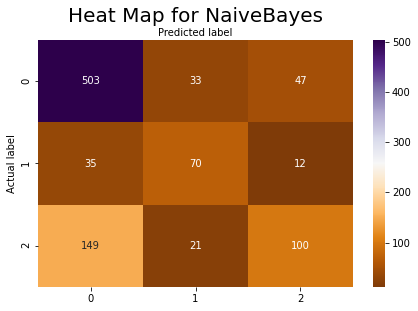

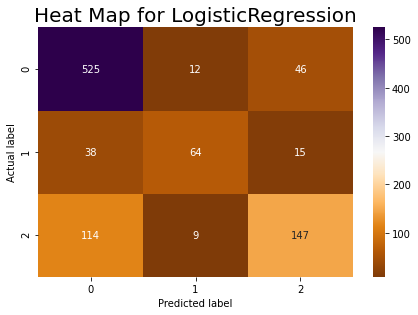

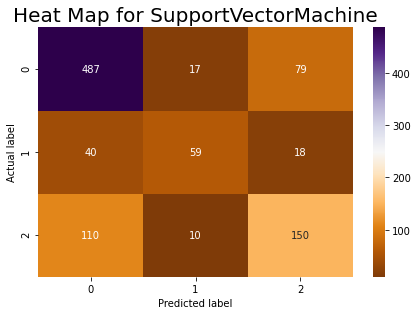

In [19]:
# Plot Heatmaps for all models

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)


for model,name in models.items():
    y_pred = model.predict(X_test)
    cnf_matrix = confusion_matrix(y_test,y_pred)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'PuOr',
            fmt = 'g')
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title(f'Heat Map for {name}', {'fontsize':20})
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

In [20]:
# Classification Report
for model,name in models.items():
    y_pred = model.predict(X_test)
    print(f"Classification Report for {name}")  
    print("----------------------------------------------------------")
    print(classification_report(y_test,y_pred))
    print("----------------------------------------------------------")

Classification Report for NaiveBayes
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       583
           1       0.56      0.60      0.58       117
           2       0.63      0.37      0.47       270

    accuracy                           0.69       970
   macro avg       0.64      0.61      0.61       970
weighted avg       0.68      0.69      0.68       970

----------------------------------------------------------
Classification Report for LogisticRegression
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       583
           1       0.75      0.55      0.63       117
           2       0.71      0.54      0.62       270

    accuracy                           0.76       970
   macro avg       0.75      0.66      0.69       970
weighted avg       0.75      0.76 